# Unit 5 - Financial Planning


In [122]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [123]:
# Load .env enviroment variables
load_dotenv("jfk.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [124]:
# Set current amount of crypto assets
crypto_amount = {
    "Crypto Amounts": [1.2, 5.3]
}

# Set the tickers
crypto_tickers = ["BTC", "ETH"]

# Create the shares DataFrame
df_crypto_amount = pd.DataFrame(crypto_amount, index=crypto_tickers)

# Display shares data
df_crypto_amount


,Crypto Amounts
BTC,1.2
ETH,5.3


In [125]:
my_btc = 1.2
my_eth = 5.3

In [126]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [127]:
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18663456,
            "total_supply": 18663456,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 52633.0,
                    "volume_24h": 70864135645,
                    "market_cap": 984218715165,
                    "percentage_change_1h": 0.845479482012995,
                    "percentage_change_24h": -3.814878208351,
                    "percentage_change_7d": -7.3853602371042,
                    "percent_change_1h": 0.845479482012995,
                    "percent_change_24h": -3.814878208351,
                    "percent_change_7d": -7.3853602371042
                },
                "CAD": {
                    "price": 66217.5773,
                    "volume_24h": 89154169054.9745,
                    "mark

In [128]:
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
btc_price

52633.0

In [129]:
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115187400,
            "total_supply": 115187400,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1583.74,
                    "volume_24h": 35921306183,
                    "market_cap": 183078955945,
                    "percentage_change_1h": 0.866879095586074,
                    "percentage_change_24h": -5.31231773359194,
                    "percentage_change_7d": -12.430482569012,
                    "percent_change_1h": 0.866879095586074,
                    "percent_change_24h": -5.31231773359194,
                    "percent_change_7d": -12.430482569012
                },
                "CAD": {
                    "price": 1992.503294,
                    "volume_24h": 45192595308.8323,
                 

In [130]:
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
eth_price

1583.74

In [131]:
# Fetch current BTC price
print("BTC price: $" + str(btc_price))

# Fetch current ETH price
print("ETH price: $" + str(eth_price))

# Compute current value of my crpto
my_btc_value = btc_price * df_crypto_amount.loc["BTC"]["Crypto Amounts"]
my_eth_value = eth_price * df_crypto_amount.loc["ETH"]["Crypto Amounts"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

BTC price: $52633.0
ETH price: $1583.74
The current value of your 1.2 BTC is $63159.60
The current value of your 5.3 ETH is $8393.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [132]:
# Current amount of shares
share_amount = {
    "Share Amounts": [50, 200]
}

tickers = ["SPY", "AGG"]

df_share_amount = pd.DataFrame(share_amount, index=tickers)

df_share_amount

,Share Amounts
SPY,50
AGG,200


In [133]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [134]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [135]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [136]:
# Compute the current value of shares
my_spy = 50
my_agg = 200

my_spy_value = spy_close_price * df_share_amount.loc["SPY"]["Share Amounts"]
my_agg_value = agg_close_price * df_share_amount.loc["AGG"]["Share Amounts"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [137]:
# Set monthly household income
monthly_income = 12000

crypto_value = my_btc_value + my_eth_value
display(crypto_value)

share_value = my_spy_value + my_agg_value
display(share_value)

# Create savings DataFrame
savings_amount = {
    "Amount": [(crypto_value), (share_value)]
}

assets = ["Crypto", "Shares"]

df_savings = pd.DataFrame(savings_amount, index=assets)

# Display savings DataFrame
display(df_savings)

71553.42199999999

42175.0

,Amount
Crypto,71553.422
Shares,42175.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

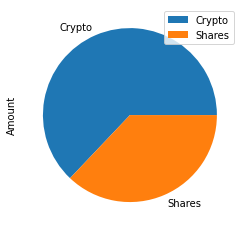

In [138]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [139]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"The value of your emergency fund is ${emergency_fund:0.2f}")

# Calculate total amount of savings
savings_account = crypto_value + share_value
print(f"The value of your savings account is ${savings_account:0.2f}")


# Validate saving health

if emergency_fund < savings_account:
    print("Congratulations! You have more than enough money in your emergency fund")
elif emergency_fund > savings_account:
    print("Sorry, your savings account has insufficient funds to cover your emergency fund")
else:
    print("Congratulations! Your savings account is equal to your emergency fund")


The value of your emergency fund is $36000.00
The value of your savings account is $113728.42
Congratulations! You have more than enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [140]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-23', tz='America/New_York').isoformat()

In [141]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2020-10-28 00:00:00-04:00  117.81  117.955  117.72  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.40  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.22  117.23  6522417  328.28   
2020-11-02 00:00:00-05:00  117.35  117.350  117.18  117.24  6263289  330.20   
2020-11-03 00:00:00-05:00  117.22  117.220  117.05  117.15  6215781  333.69   

                                                                  
                               high       low   close     volume  
time                                                              
2020-10-28 00:00:00-04:00  338.2483  326.1300  326.67  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.0900  329.99   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.6000  326.53   93413096  
2020-11-02 00:00:00-05:00  332.3600  327.2400  330.21   69167640  
2020-11-03 00:00:00-05:00  338.2500  330.2935  335.97   74330624

In [142]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6,],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [143]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2020-10-28 00:00:00-04:00  117.81  117.955  117.72  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.40  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.22  117.23  6522417   
2020-11-02 00:00:00-05:00  117.35  117.350  117.18  117.24  6263289   
2020-11-03 00:00:00-05:00  117.22  117.220  117.05  117.15  6215781   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-10-28 00:00:00-04:00          NaN  332.10  338.2483  326.1300  326.67   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.0900  329.99   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.6000  326.53   
2020-11-02 00:00:00-05:00     0.000085  330.20  332.3600  327.2400  330.21   
2020-11-03 00:00:00-05:00    -0.000768  333.69  338.2500  330.2935  335.97   

                                                   
                              volume daily_return  
time                                               
2020-10-28 00:00:00-04:00  107939571          NaN  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485  
2020-11-02 00:00:00-05:00   69167640     0.011270  
2020-11-03 00:00:00-05:00   74330624     0.017443

In [101]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991391,0.997614,0.992034,1.002391,0.995773,0.998242,1.001588,0.998782,1.007690,1.003908,...,0.993337,0.991621,0.996136,0.998028,0.990812,0.995130,1.016460,1.001072,0.986370,0.999169
2,0.991821,0.992621,0.993829,1.014785,1.002533,0.990013,1.000899,1.002904,1.005468,1.006552,...,0.991105,0.999076,0.997036,0.993705,0.980881,0.990529,1.016235,1.012013,0.986560,1.008180
3,0.990871,0.988958,0.996747,1.017623,0.999590,0.992831,0.991913,1.002717,1.002840,1.008840,...,0.990470,1.000628,0.998403,0.998892,0.983241,0.992483,1.012325,1.010573,0.991824,1.004107
4,0.992027,0.992516,1.001992,1.019514,0.994706,0.984590,0.995169,0.997692,1.016696,1.002434,...,0.989056,0.998775,1.009831,1.009220,0.981834,1.000962,1.003723,1.021338,0.992867,1.009500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1011.363236,1056.327043,1222.821184,537.397857,2150.150359,985.898012,918.346702,728.515502,756.680993,2582.218062,...,1215.914155,989.030326,567.105280,1696.546861,1267.084415,1782.733733,1027.340345,732.660101,1688.535289,2192.259992
7557,1018.719850,1051.971806,1230.074626,542.977306,2142.639345,993.954588,914.953715,731.474635,755.186202,2588.822665,...,1221.474844,983.841056,566.081213,1697.123608,1263.684754,1785.646610,1023.348063,729.863186,1687.282436,2203.372676
7558,1021.202336,1042.392910,1236.314326,540.509619,2142.260371,1003.135136,915.124131,735.865344,760.319127,2589.707342,...,1219.776813,984.337215,568.573799,1695.443113,1254.048398,1773.489802,1016.026769,723.758386,1707.137692,2216.499384
7559,1027.988398,1041.754138,1238.188603,539.679698,2138.263772,1002.137115,918.034403,735.488271,762.535985,2586.012637,...,1199.601914,986.693699,578.436659,1707.922090,1248.060181,1781.675852,1010.958463,720.060303,1697.602851,2211.595000


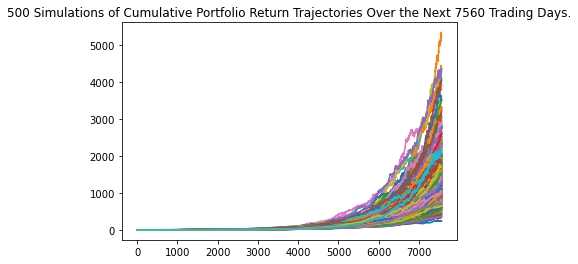

In [102]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

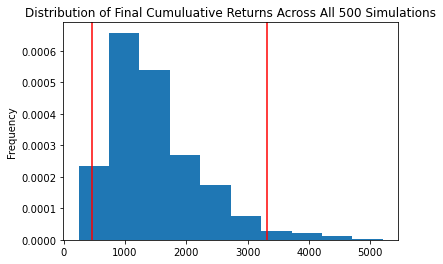

In [103]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [104]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count            500.000000
mean            1490.988612
std              747.947887
min              244.392584
25%              968.162981
50%             1318.971685
75%             1843.638553
max             5206.706610
95% CI Lower     464.916831
95% CI Upper    3315.098994
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [106]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $9298336.61 and $66301979.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [107]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment_2,2)
ci_upper = round(even_tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $13947504.92 and $99452969.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [109]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6,],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [110]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991764,1.000592,1.001850,0.993508,1.005360,1.004308,0.995503,1.008089,1.003843,0.996656,...,0.991579,0.994532,1.002378,1.006204,1.002086,0.996113,0.991251,0.995109,0.998117,0.997974
2,0.995107,0.996245,0.998633,0.989461,1.004313,1.000672,1.005490,1.015042,1.004659,0.999026,...,0.983347,0.996047,1.002744,1.005768,1.008690,0.998397,0.991897,0.990775,0.996741,0.998657
3,1.000029,0.987444,0.997423,0.986131,1.004649,1.004984,1.000748,1.009293,1.019210,1.000337,...,0.992260,0.992146,1.002505,1.008073,1.004420,0.991325,0.987196,0.989961,1.005501,0.995776
4,1.002531,0.985458,1.005886,1.000574,1.004819,1.000973,1.008626,1.007088,1.007526,1.004694,...,0.988251,1.003720,0.998089,1.000782,1.000211,0.992906,0.981114,0.986908,1.005019,0.988051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.405278,2.966131,3.241295,2.314853,4.045216,3.096064,3.849292,3.681731,2.515906,2.416578,...,2.930813,2.169601,3.274928,3.320916,3.386325,3.955028,3.173112,3.479250,2.984172,2.981416
1257,2.390301,2.973423,3.266159,2.314073,4.061822,3.082472,3.857497,3.683404,2.534031,2.388726,...,2.908121,2.180659,3.300611,3.326525,3.368842,3.997355,3.155243,3.499861,2.992841,2.999559
1258,2.400002,2.997990,3.265055,2.320562,4.043100,3.086728,3.867645,3.678119,2.535617,2.397609,...,2.905030,2.171153,3.301832,3.323745,3.329829,3.997338,3.123420,3.517480,2.981027,3.020726
1259,2.400382,2.990980,3.266966,2.316992,4.054577,3.117365,3.889930,3.672067,2.541056,2.409876,...,2.920181,2.182867,3.292757,3.342659,3.344265,4.020819,3.143447,3.551026,3.000387,3.007538


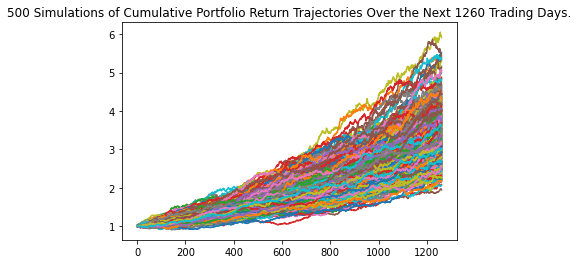

In [115]:
# Plot simulation outcomes
line_plot_5 = MC_even_dist_5.plot_simulation()

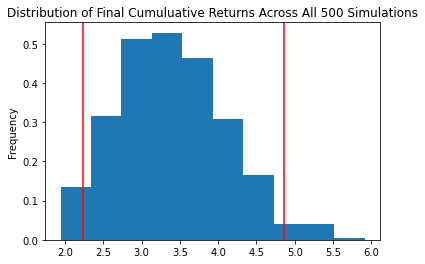

In [112]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_even_dist_5.plot_distribution()

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5 = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5)

count            500.000000
mean            1490.988612
std              747.947887
min              244.392584
25%              968.162981
50%             1318.971685
75%             1843.638553
max             5206.706610
95% CI Lower     464.916831
95% CI Upper    3315.098994
Name: 7560, dtype: float64


In [114]:
# Set initial investment
initial_investment_3 = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(even_tbl[8]*initial_investment_3,2)
ci_upper_5 = round(even_tbl[9]*initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $4649168.31 and $33150989.94


### Ten Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6,],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [117]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002860,1.008699,1.000189,0.998327,1.004876,1.001032,1.003639,0.992336,1.006022,0.995555,...,0.998955,1.005701,0.998232,1.001600,1.006816,1.000424,1.003210,1.007498,0.998903,1.002939
2,1.006529,1.006242,1.014289,0.988811,0.993827,1.002008,1.010212,0.993731,1.002886,1.000099,...,1.005127,1.011568,0.990817,1.010822,1.002668,1.004843,1.001973,1.012294,1.004184,1.007852
3,1.013223,1.005435,1.022993,0.980219,0.994450,1.003732,1.009545,0.993113,1.008555,0.998586,...,1.002643,1.008371,0.987661,1.003091,1.001762,1.016362,1.009752,1.003297,1.013471,1.007964
4,1.010940,1.004877,1.021425,0.990721,0.997515,0.993359,1.013947,0.995381,1.004289,0.998067,...,0.992944,0.999411,0.991013,0.997233,1.005846,1.023276,1.003688,1.004974,1.015283,1.009644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.163946,18.183152,15.701786,12.895350,15.561246,9.566677,12.027756,15.792580,10.584783,12.142228,...,10.962643,11.982123,12.854826,10.061330,15.991144,11.756062,9.118540,8.028485,13.668446,8.438305
2517,6.211463,18.304071,15.723303,12.810653,15.618553,9.497964,11.943879,15.847858,10.557450,12.151268,...,10.949095,11.928994,12.992586,10.029426,16.036249,11.853174,9.114602,7.968806,13.574578,8.436799
2518,6.246855,18.412429,15.736611,12.854454,15.635458,9.521876,11.959956,15.884256,10.480845,12.150740,...,10.959316,11.903623,12.903048,10.019664,16.068193,11.921344,9.128020,7.942718,13.492391,8.483260
2519,6.232760,18.508212,15.852908,12.912861,15.779619,9.499879,11.919239,16.052348,10.424603,12.060156,...,11.118089,11.851146,12.895951,9.985498,16.121645,11.924138,9.091672,7.947900,13.559128,8.545366


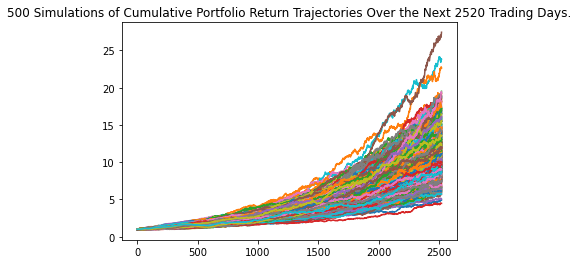

In [118]:
# Plot simulation outcomes
line_plot_10 = MC_even_dist_10.plot_simulation()

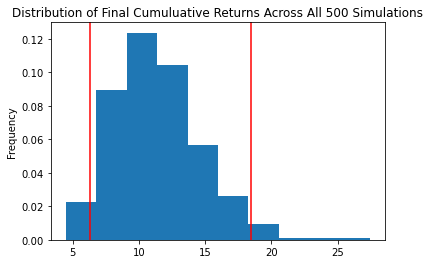

In [119]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_even_dist_10.plot_distribution()

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10 = MC_even_dist.summarize_cumulative_return()


# Print summary statistics
print(even_tbl_10)

count            500.000000
mean            1490.988612
std              747.947887
min              244.392584
25%              968.162981
50%             1318.971685
75%             1843.638553
max             5206.706610
95% CI Lower     464.916831
95% CI Upper    3315.098994
Name: 7560, dtype: float64


In [121]:
# Set initial investment
initial_investment_4 = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(even_tbl[8]*initial_investment_4,2)
ci_upper_10 = round(even_tbl[9]*initial_investment_4,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 10 years will end within in the range of $4649168.31 and $33150989.94
